In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [2]:
data = pd.read_csv('D:\MA902\spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.shape

(5171, 4)

In [4]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
# dropping unwanted columns
data = data.drop("Unnamed: 0", axis = 1)

In [6]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
label        5171 non-null object
text         5171 non-null object
label_num    5171 non-null int64
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [8]:
#checking missing values
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

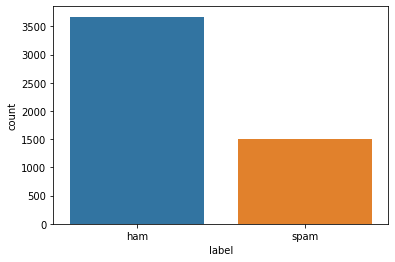

In [9]:
sns.countplot(x="label",data=data)


In [10]:
print("Count of labels:\n",data['label'].value_counts())

Count of labels:
 ham     3672
spam    1499
Name: label, dtype: int64


In [11]:
print("Not a Spam Email(ham) :",round(len(data[data['label']=="ham"])/len(data['label']),2)*100,"%")
print("Spam Email :",round(len(data[data['label']=="spam"])/len(data['label']),2)*100,"%")

Not a Spam Email(ham) : 71.0 %
Spam Email : 28.999999999999996 %


In [12]:
spam = data[data.label_num == 1]
print(spam.shape)

(1499, 3)


In [13]:
#converting spam emails to lower case
spam['text']= spam['text'].str.lower()
spam['text'].head()

C:\Users\Dushyanth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3     subject: photoshop , windows , office . cheap ...
7     subject: looking for medication ? we ` re the ...
10    subject: vocable % rnd - word asceticism\r\nvc...
11    subject: report 01405 !\r\nwffur attion brom e...
13    subject: vic . odin n ^ ow\r\nberne hotbox car...
Name: text, dtype: object

In [14]:
#removing punctuation from text
spam_emails = spam['text'].str.split(' ')
spam_emails.head()

3     [subject:, photoshop, ,, windows, ,, office, ....
7     [subject:, looking, for, medication, ?, we, `,...
10    [subject:, vocable, %, rnd, -, word, asceticis...
11    [subject:, report, 01405, !\r\nwffur, attion, ...
13    [subject:, vic, ., odin, n, ^, ow\r\nberne, ho...
Name: text, dtype: object

In [15]:
import string
spam_cleaned = []

for text in spam_emails:
    text = [x.strip(string.punctuation) for x in text]
    spam_cleaned.append(text)

spam_cleaned[0]

text_spam = [" ".join(text) for text in spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:300]

'subject photoshop  windows  office  cheap  main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented '

In [16]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(["subject","ect","\r","\n","nbsp","http","www","href","Subject"])
wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=200).generate(final_text_spam)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dushyanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


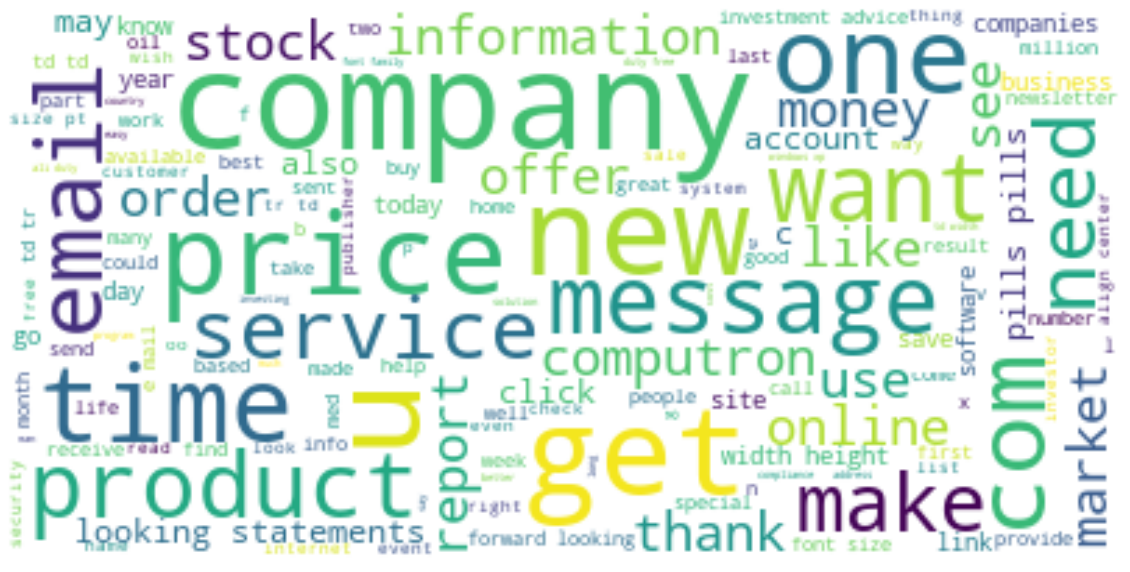

In [17]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
ham = data[data.label_num == 0]
print(ham.shape)

ham['text']= ham['text'].str.lower()
ham['text'].head()

ham_emails = ham['text'].str.split(' ')
ham_emails.head()


ham_cleaned = []

for text in ham_emails:
    text = [x.strip(string.punctuation) for x in text]
    ham_cleaned.append(text)

ham_cleaned[0]

text_ham = [" ".join(text) for text in ham_cleaned]
final_text_ham = " ".join(text_spam)
final_text_ham[:300]

wordcloud_ham = WordCloud(stopwords=stopwords, background_color="black", max_font_size=30, max_words=200).generate(final_text_ham)


(3672, 3)


C:\Users\Dushyanth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


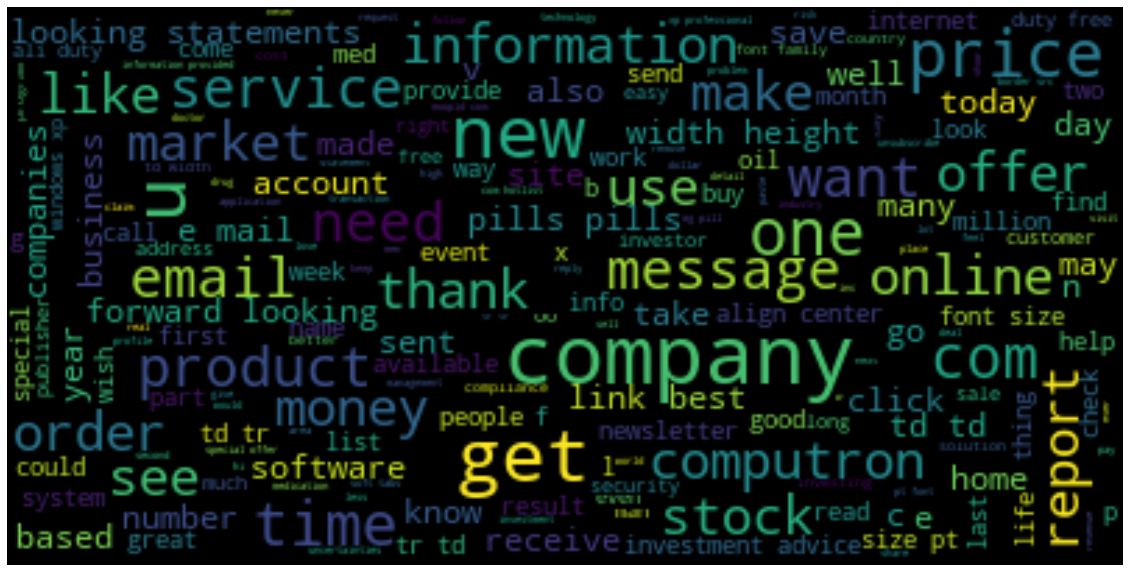

In [19]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from nltk.tokenize import word_tokenize
data['text'] = data['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stopwords]))

In [21]:
X = data.loc[:, 'text']
y =data.loc[:, 'label_num'].values

In [22]:
X[5]

': ehronline web address change message intended ehronline users . due recent change ehronline , url ( aka `` web address `` ) accessing ehronline needs changed computer . change involves adding letter `` `` `` `` reference url . url accessing ehronline : https : / / ehronline . enron . com . change made added url favorite browser .'

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()

In [24]:
X[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

In [49]:
cm1

array([[1107,   21],
       [  44,  380]], dtype=int64)

In [50]:
print('Accuracy of Naive Bayes classifier: ', accuracy_score(y_test, y_pred) * 100)

Accuracy of Naive Bayes classifier:  95.8118556701031


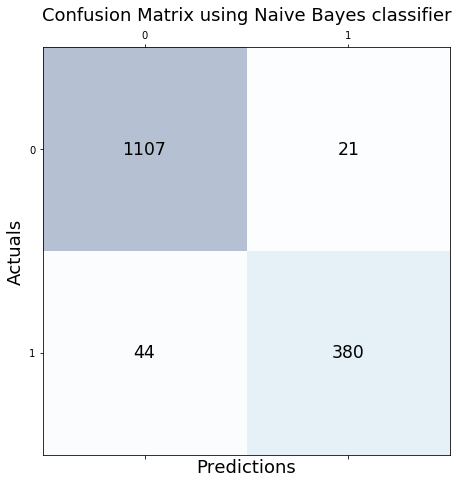

In [31]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix using Naive Bayes classifier', fontsize=18)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Predicting the Test set results
y_pred = cl.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)

In [35]:
cm2

array([[1103,   25],
       [  15,  409]], dtype=int64)

In [36]:
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.42268041237114


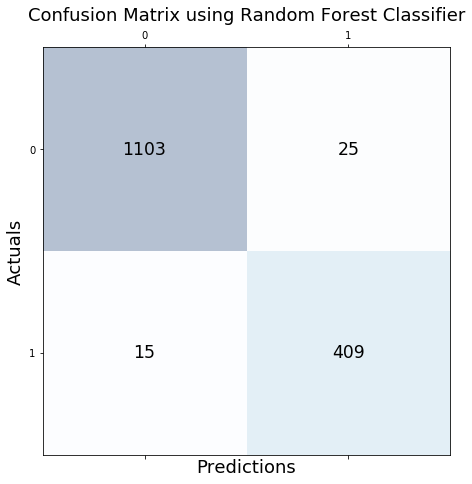

In [37]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix using Random Forest Classifier', fontsize=18)
plt.show()

In [51]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [52]:
print('Accuracy of SVM using linear kernel: ', accuracy_score(y_test, y_pred) * 100)

Accuracy of SVM using linear kernel:  96.19845360824742


In [40]:
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[1091,   37],
       [  22,  402]], dtype=int64)

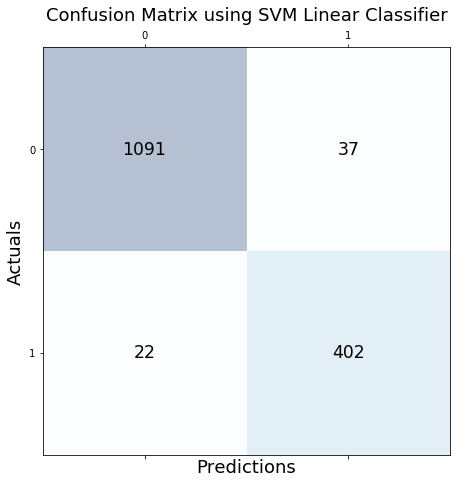

In [41]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm3.shape[0]):
    for j in range(cm3.shape[1]):
        ax.text(x=j, y=i,s=cm3[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix using SVM Linear Classifier', fontsize=18)
plt.show()

In [42]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm_sig = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf_svm_sig.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_sig = clf_svm_sig.predict(X_test)

In [54]:
print('Accuracy using svm sigmoid classifier', accuracy_score(y_test, y_pred_sig) * 100)

Accuracy using svm sigmoid classifier 96.06958762886599


In [44]:
cm4 = confusion_matrix(y_test, y_pred_sig)
cm4

array([[1070,   58],
       [   3,  421]], dtype=int64)

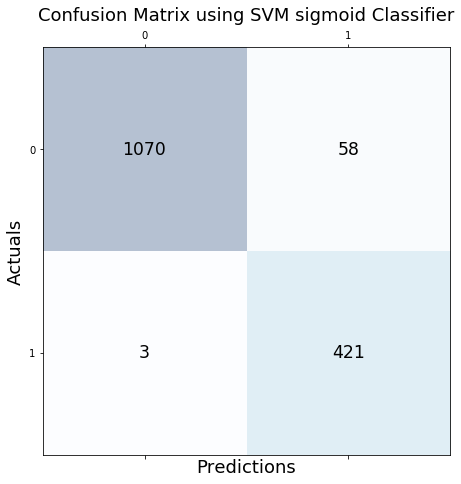

In [45]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm4, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm4.shape[0]):
    for j in range(cm4.shape[1]):
        ax.text(x=j, y=i,s=cm4[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix using SVM sigmoid Classifier', fontsize=18)
plt.show()